<a href="https://colab.research.google.com/github/Kamran-Ali-Shah/Kamran-Ali-Shah/blob/main/Linear_Regression_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the dslabs package
install.packages("dslabs")

# Load the libraries
library(tidyverse)
library(dslabs)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Install the dslabs package
install.packages("dslabs")

# Load the libraries
library(tidyverse)
library(dslabs)

# Install gridExtra if not already installed
if (!requireNamespace("gridExtra", quietly = TRUE)) {
  install.packages("gridExtra")
}

# Load gridExtra
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
# Install the caret package
install.packages("caret")

# Load the caret library
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘sparsevctrs’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




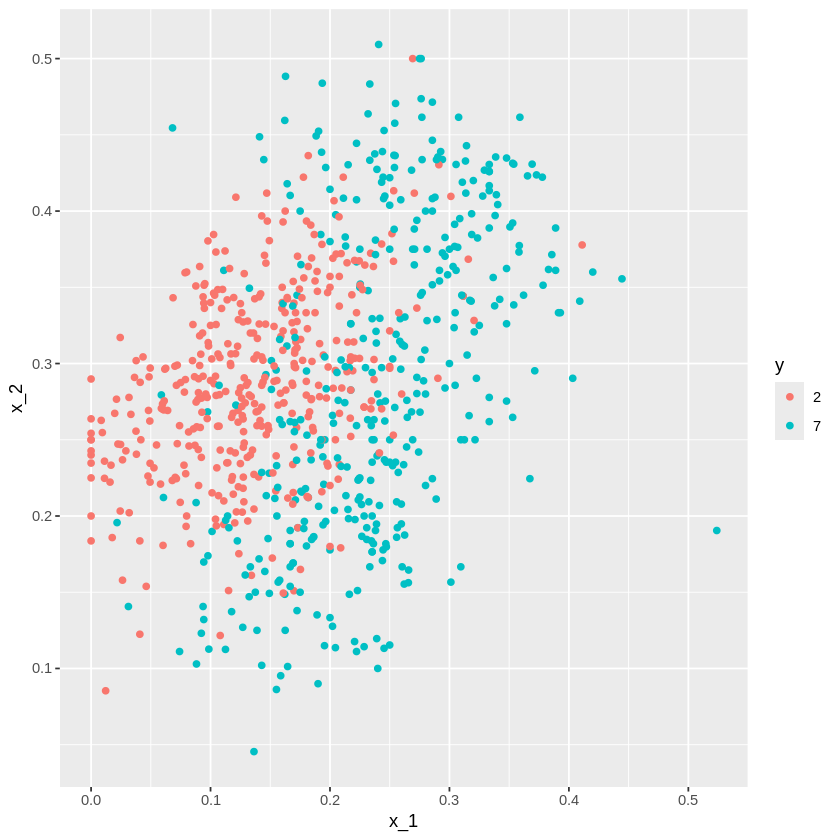

[1] 0.775

Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


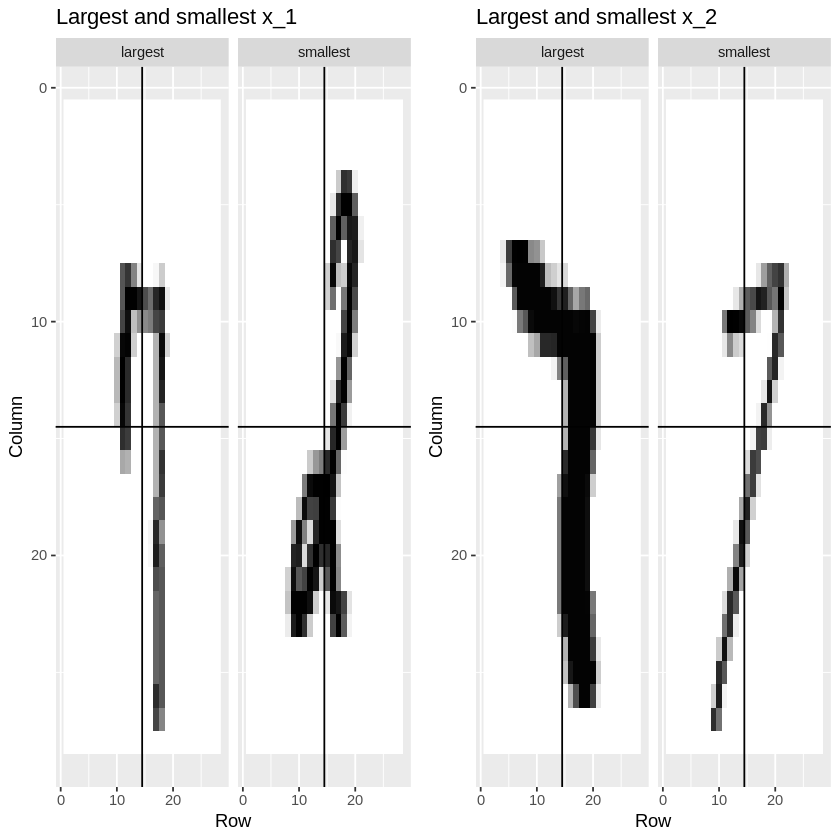

Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


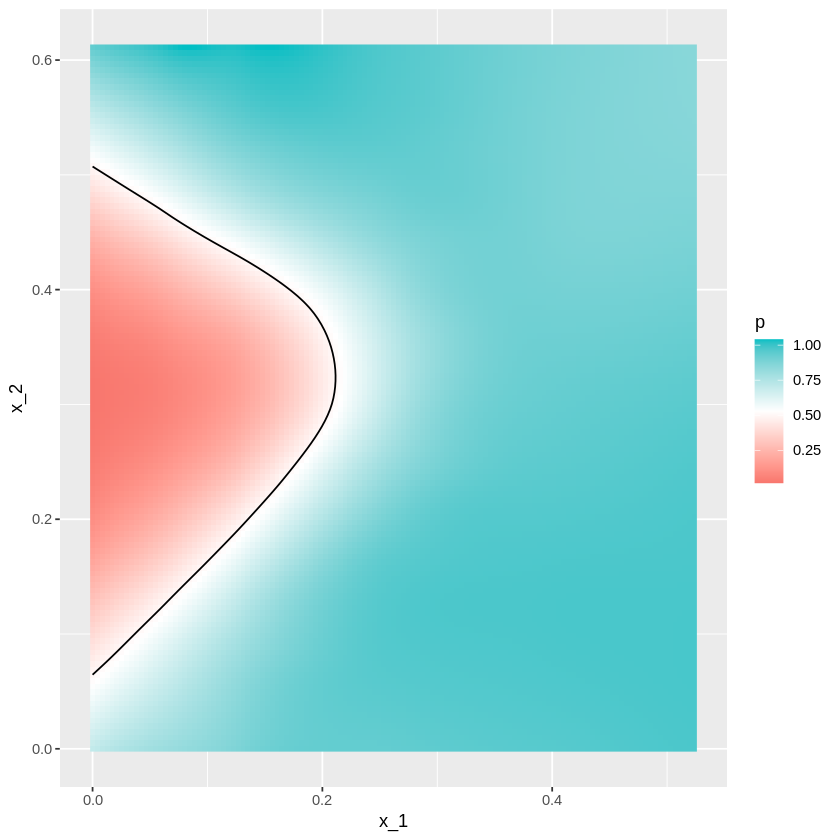

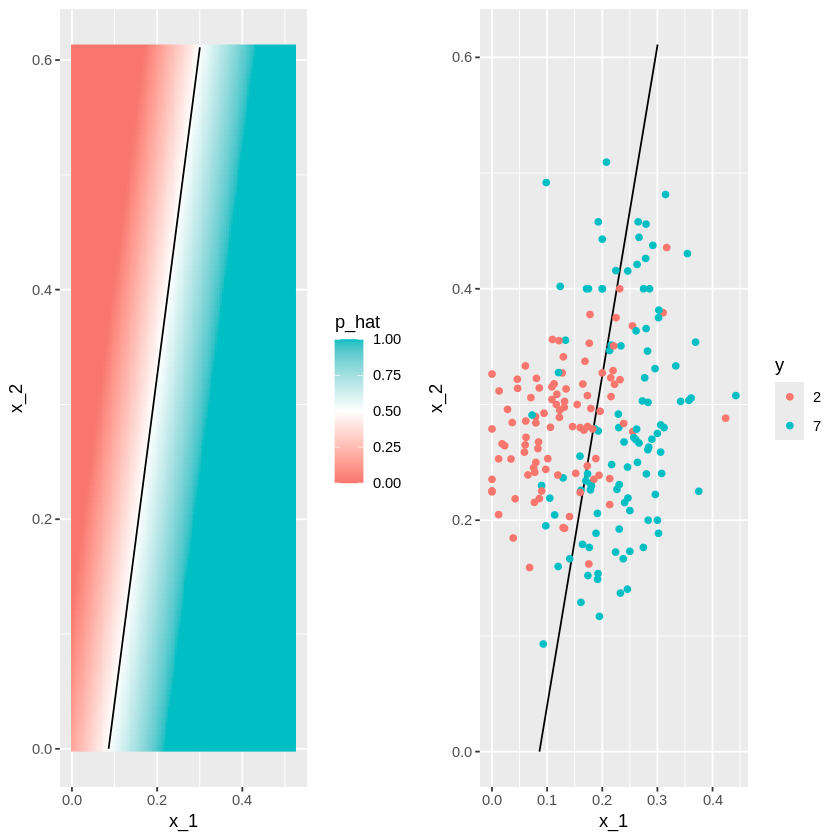

In [4]:
# Load the dataset
library(tidyverse)
library(dslabs)
data("mnist_27")

# Explore the data by plotting the two predictors
mnist_27$train %>% ggplot(aes(x_1, x_2, color = y)) + geom_point()

# Smallest and largest values of x1 and x2
if(!exists("mnist")) mnist <- read_mnist()
is <- mnist_27$index_train[c(which.min(mnist_27$train$x_1), which.max(mnist_27$train$x_1))]
titles <- c("smallest","largest")
tmp <- lapply(1:2, function(i){
    expand.grid(Row=1:28, Column=1:28) %>%
      mutate(label=titles[i],
             value = mnist$train$images[is[i],])
})
tmp <- Reduce(rbind, tmp)
p1 <- tmp %>% ggplot(aes(Row, Column, fill=value)) +
  geom_raster(show.legend = FALSE) +
  scale_y_reverse() +
  scale_fill_gradient(low="white", high="black") +
  facet_grid(.~label) +
  geom_vline(xintercept = 14.5) +
  geom_hline(yintercept = 14.5) +
  ggtitle("Largest and smallest x_1")

is <- mnist_27$index_train[c(which.min(mnist_27$train$x_2), which.max(mnist_27$train$x_2))]
titles <- c("smallest","largest")
tmp <- lapply(1:2, function(i){
    expand.grid(Row=1:28, Column=1:28) %>%
      mutate(label=titles[i],
             value = mnist$train$images[is[i],])
})
tmp <- Reduce(rbind, tmp)
p2 <- tmp %>% ggplot(aes(Row, Column, fill=value)) +
    geom_raster(show.legend = FALSE) +
    scale_y_reverse() +
    scale_fill_gradient(low="white", high="black") +
    facet_grid(.~label) +
    geom_vline(xintercept = 14.5) +
    geom_hline(yintercept = 14.5) +
  ggtitle("Largest and smallest x_2")
gridExtra::grid.arrange(p1, p2, ncol = 2)

# Fit the model
fit <- mnist_27$train %>%
  mutate(y = ifelse(y == 7, 1, 0)) %>%
  lm(y ~ x_1 + x_2, data = .)

# Build a decision rule
library(caret)

# Corrected line: use <- instead of <
p_hat <- predict(fit, newdata = mnist_27$test, type = "response")
y_hat <- factor(ifelse(p_hat > 0.5, 7, 2))

# Calculate accuracy
confusionMatrix(y_hat, mnist_27$test$y)$overall[["Accuracy"]]

# Plot the true values
mnist_27$true_p %>% ggplot(aes(x_1, x_2, z = p, fill = p)) +
  geom_raster() +
  scale_fill_gradientn(colors=c("#F8766D", "white", "#00BFC4")) +
  stat_contour(breaks=c(0.5), color="black")

# Visual representation of p_hat
p_hat <- predict(fit, newdata = mnist_27$true_p)
p_hat <- scales::squish(p_hat, c(0, 1))
p1 <- mnist_27$true_p %>% mutate(p_hat = p_hat) %>%
  ggplot(aes(x_1, x_2,  z=p_hat, fill=p_hat)) +
  geom_raster() +
  scale_fill_gradientn(colors=c("#F8766D","white","#00BFC4")) +
  stat_contour(breaks=c(0.5), color="black")

p2 <- mnist_27$true_p %>% mutate(p_hat = p_hat) %>%
  ggplot() +
  stat_contour(aes(x_1, x_2, z=p_hat), breaks=c(0.5), color="black") +
  geom_point(mapping = aes(x_1, x_2, color=y), data = mnist_27$test)
gridExtra::grid.arrange(p1, p2, ncol = 2)

In [5]:
library(tidyverse)
library(caret)

set.seed(1)
n <- 100
Sigma <- 9*matrix(c(1.0, 0.5, 0.5, 1.0), 2, 2)
dat <- MASS::mvrnorm(n = 100, c(69, 69), Sigma) %>%
      data.frame() %>% setNames(c("x", "y"))

In [6]:
library(tidyverse)
library(caret)
library(MASS)

set.seed(1)
n <- 100
Sigma <- 9 * matrix(c(1.0, 0.5, 0.5, 1.0), 2, 2)
dat <- MASS::mvrnorm(n = 100, c(69, 69), Sigma) %>%
  data.frame() %>% setNames(c("x", "y"))

set.seed(1)
rmse_vals <- replicate(100, {
  # Partition data
  train_index <- createDataPartition(dat$y, p = 0.5, list = FALSE)
  train_set <- dat[train_index, ]
  test_set <- dat[-train_index, ]

  # Train linear model
  model <- lm(y ~ x, data = train_set)

  # Generate predictions and calculate RMSE
  preds <- predict(model, newdata = test_set)
  sqrt(mean((preds - test_set$y)^2))
})

# Calculate mean and standard deviation
mean_rmse <- mean(rmse_vals)
sd_rmse <- sd(rmse_vals)

# Print results
sprintf("Mean: %.3f", mean_rmse)
sprintf("SD: %.3f", sd_rmse)



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




[1] "Mean: 2.466"

[1] "SD: 0.125"

In [7]:
library(tidyverse)
library(caret)
library(MASS)

# Define function to generate data, build models, and return RMSE statistics
compute_rmse_stats <- function(n) {
  Sigma <- 9 * matrix(c(1.0, 0.5, 0.5, 1.0), 2, 2)
  dat <- MASS::mvrnorm(n = n, c(69, 69), Sigma) %>%
    data.frame() %>% setNames(c("x", "y"))

  rmse_vals <- replicate(100, {
    # Partition data
    train_index <- createDataPartition(dat$y, p = 0.5, list = FALSE)
    train_set <- dat[train_index, ]
    test_set <- dat[-train_index, ]

    # Train linear model
    model <- lm(y ~ x, data = train_set)

    # Generate predictions and calculate RMSE
    preds <- predict(model, newdata = test_set)
    sqrt(mean((preds - test_set$y)^2))
  })

  # Return mean and standard deviation
  c(mean = mean(rmse_vals), sd = sd(rmse_vals))
}

# Set seed once
set.seed(1)

# Define dataset sizes
n_values <- c(100, 500, 1000, 5000, 10000)

# Apply function to dataset sizes
results <- sapply(n_values, compute_rmse_stats)

# Print results
results_df <- data.frame(
  n = n_values,
  Mean = results["mean", ],
  SD = results["sd", ]
)

print(results_df, digits = 3)


      n Mean     SD
1   100 2.47 0.1359
2   500 2.58 0.0802
3  1000 2.62 0.0419
4  5000 2.53 0.0209
5 10000 2.58 0.0167


In [8]:
set.seed(1)
n <- 100
Sigma <- 9*matrix(c(1.0, 0.95, 0.95, 1.0), 2, 2)
dat <- MASS::mvrnorm(n = 100, c(69, 69), Sigma) %>%
	data.frame() %>% setNames(c("x", "y"))

In [9]:
library(tidyverse)
library(caret)
library(MASS)

set.seed(1)
n <- 100
Sigma <- 9 * matrix(c(1.0, 0.95, 0.95, 1.0), 2, 2)
dat <- MASS::mvrnorm(n = n, c(69, 69), Sigma) %>%
  data.frame() %>% setNames(c("x", "y"))

set.seed(1)
rmse_vals <- replicate(100, {
  # Partition data
  train_index <- createDataPartition(dat$y, p = 0.5, list = FALSE)
  train_set <- dat[train_index, ]
  test_set <- dat[-train_index, ]

  # Train linear model
  model <- lm(y ~ x, data = train_set)

  # Generate predictions and calculate RMSE
  preds <- predict(model, newdata = test_set)
  sqrt(mean((preds - test_set$y)^2))
})

# Calculate mean and standard deviation
mean_rmse <- mean(rmse_vals)
sd_rmse <- sd(rmse_vals)

# Print results
sprintf("Mean: %.3f", mean_rmse)
sprintf("SD: %.3f", sd_rmse)


[1] "Mean: 0.916"

[1] "SD: 0.066"

In [10]:
library(tidyverse)
library(caret)
library(MASS)

# Generate data
set.seed(1)
Sigma <- matrix(c(1.0, 0.75, 0.75, 0.75, 1.0, 0.25, 0.75, 0.25, 1.0), 3, 3)
dat <- MASS::mvrnorm(n = 100, c(0, 0, 0), Sigma) %>%
  data.frame() %>% setNames(c("y", "x_1", "x_2"))

# Partition data into training (50%) and test (50%) sets
set.seed(1)
train_index <- createDataPartition(dat$y, p = 0.5, list = FALSE)
train_set <- dat[train_index, ]
test_set <- dat[-train_index, ]

# Train models
model_x1 <- lm(y ~ x_1, data = train_set)
model_x2 <- lm(y ~ x_2, data = train_set)
model_x1_x2 <- lm(y ~ x_1 + x_2, data = train_set)

# Make predictions
pred_x1 <- predict(model_x1, newdata = test_set)
pred_x2 <- predict(model_x2, newdata = test_set)
pred_x1_x2 <- predict(model_x1_x2, newdata = test_set)

# Compute RMSE
rmse_x1 <- sqrt(mean((pred_x1 - test_set$y)^2))
rmse_x2 <- sqrt(mean((pred_x2 - test_set$y)^2))
rmse_x1_x2 <- sqrt(mean((pred_x1_x2 - test_set$y)^2))

# Print results
sprintf("RMSE using x_1: %.3f", rmse_x1)
sprintf("RMSE using x_2: %.3f", rmse_x2)
sprintf("RMSE using x_1 and x_2: %.3f", rmse_x1_x2)


[1] "RMSE using x_1: 0.640"

[1] "RMSE using x_2: 0.691"

[1] "RMSE using x_1 and x_2: 0.335"

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


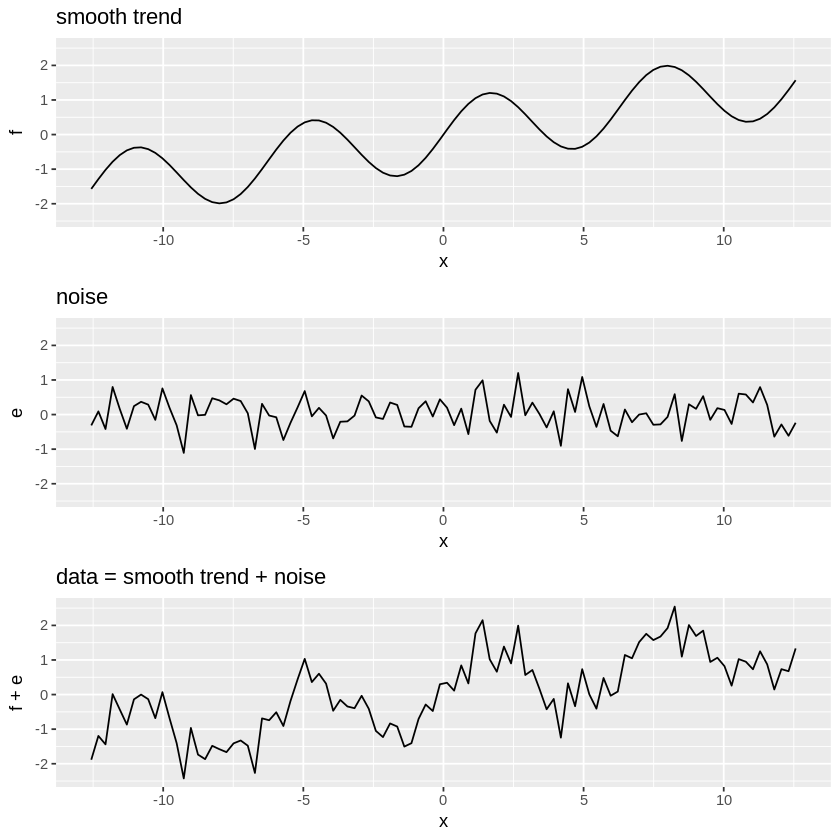

`geom_smooth()` using formula = 'y ~ x'


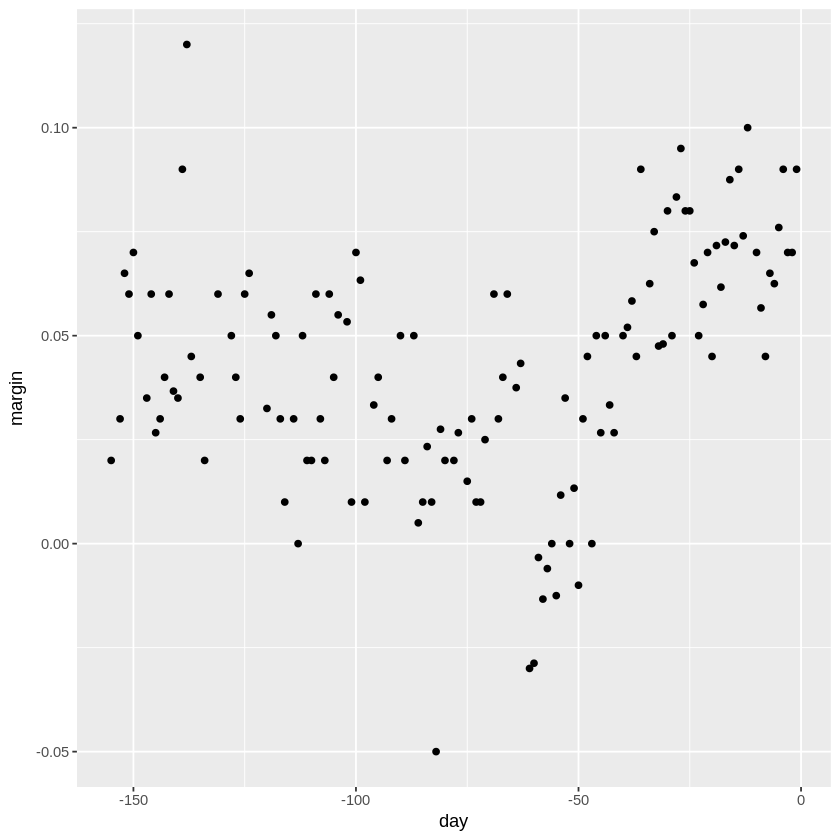

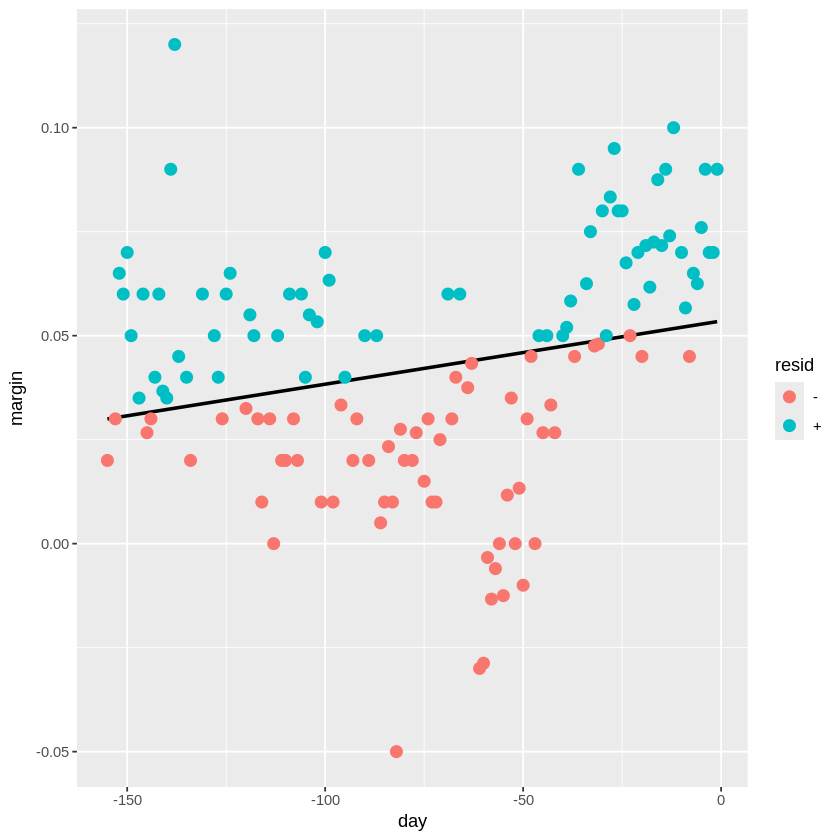

In [11]:
# see that the trend is wobbly
library(tidyverse)
set.seed(1)
n <- 100
x <- seq(-pi*4, pi*4, len = n)
tmp <- data.frame(x = x , f = sin(x) + x/8, e = rnorm(n, 0, 0.5))
p1 <- qplot(x, f, main = "smooth trend", ylim = range(tmp$f+tmp$e), data = tmp, geom = "line")
p2 <- qplot(x, e, main = "noise", ylim = range(tmp$f+tmp$e), data = tmp, geom = "line")
p3 <- qplot(x, f+e, main = "data = smooth trend + noise", ylim = range(tmp$f+tmp$e), data = tmp, geom = "line")
gridExtra::grid.arrange(p1, p2, p3)

# estimate the time trend in the 2008 US popular vote poll margin
library(tidyverse)
library(dslabs)
data("polls_2008")
qplot(day, margin, data = polls_2008)

# use regression to estimate
resid <- ifelse(lm(margin~day, data = polls_2008)$resid > 0, "+", "-")
polls_2008 %>%
     mutate(resid = resid) %>%
     ggplot(aes(day, margin)) +
     geom_smooth(method = "lm", se = FALSE, color = "black") +
     geom_point(aes(color = resid), size = 3)

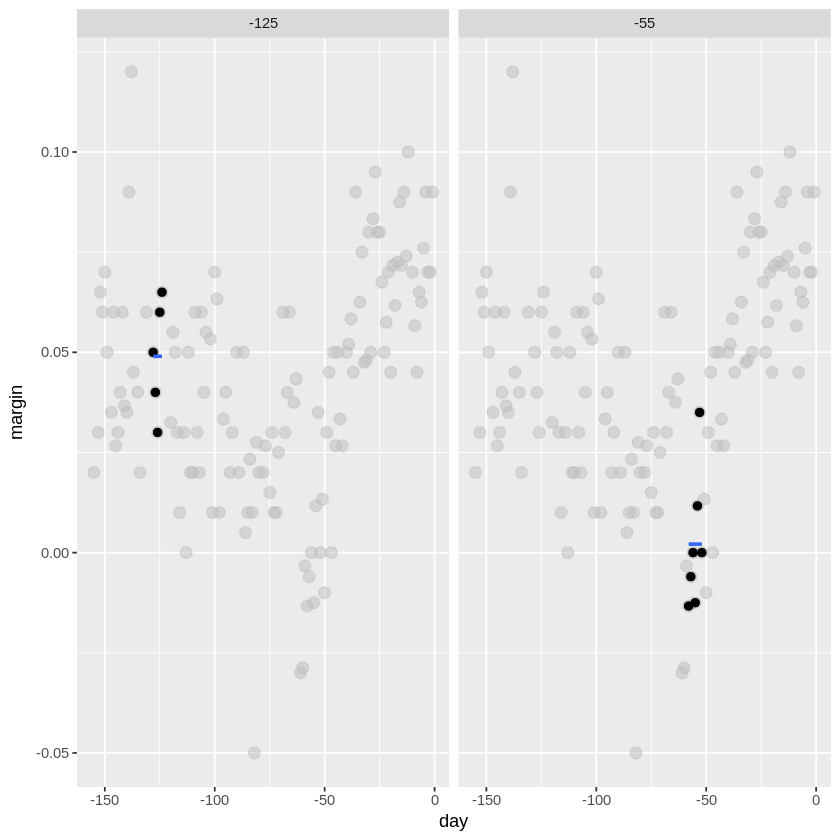

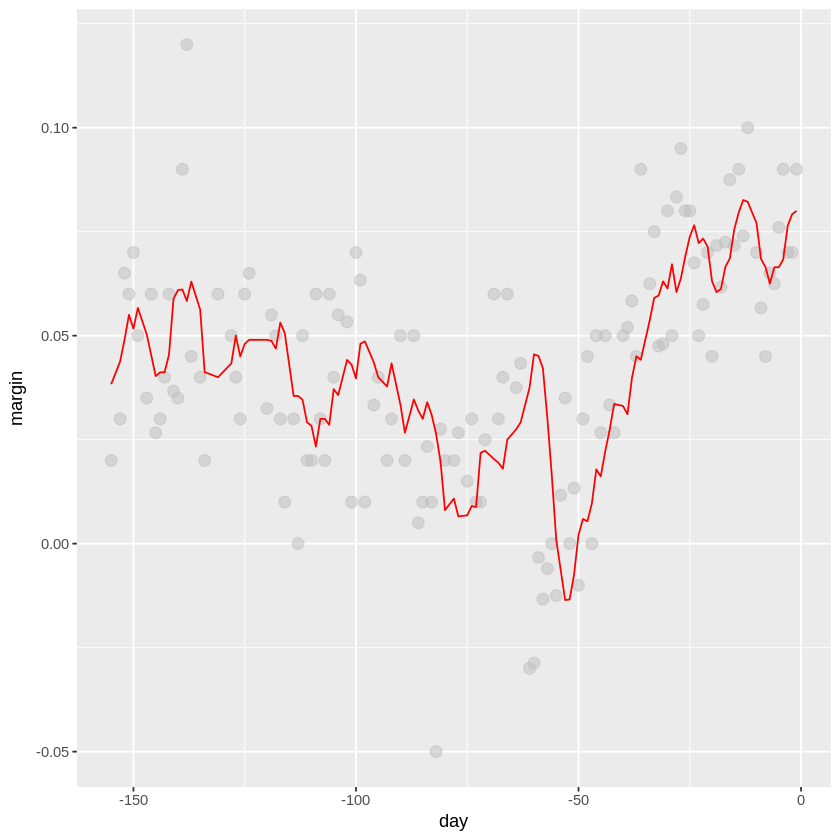

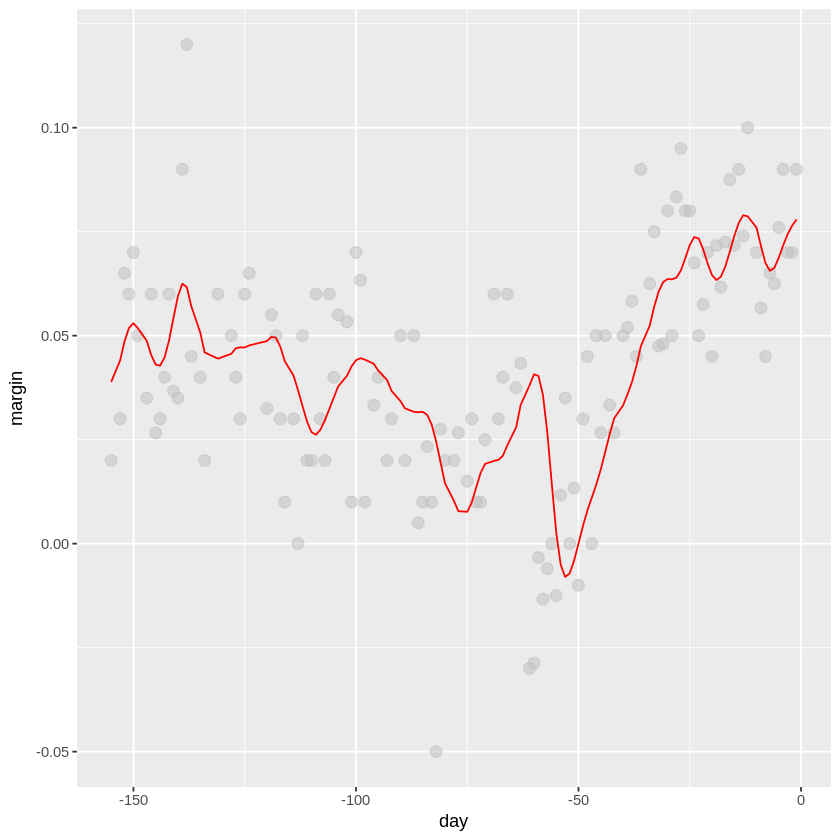

In [12]:
# bin smoothers
span <- 3.5
tmp <- polls_2008 %>%
  crossing(center = polls_2008$day) %>%
  mutate(dist = abs(day - center)) %>%
  filter(dist <= span)

tmp %>% filter(center %in% c(-125, -55)) %>%
  ggplot(aes(day, margin)) +
  geom_point(data = polls_2008, size = 3, alpha = 0.5, color = "grey") +
  geom_point(size = 2) +
  geom_smooth(aes(group = center),
              method = "lm", formula=y~1, se = FALSE) +
  facet_wrap(~center)

# larger span
span <- 7
fit <- with(polls_2008,
            ksmooth(day, margin, kernel = "box", bandwidth = span))

polls_2008 %>% mutate(smooth = fit$y) %>%
  ggplot(aes(day, margin)) +
    geom_point(size = 3, alpha = .5, color = "grey") +
  geom_line(aes(day, smooth), color="red")

# kernel
span <- 7
fit <- with(polls_2008,
            ksmooth(day, margin, kernel = "normal", bandwidth = span))

polls_2008 %>% mutate(smooth = fit$y) %>%
  ggplot(aes(day, margin)) +
  geom_point(size = 3, alpha = .5, color = "grey") +
  geom_line(aes(day, smooth), color="red")

`geom_smooth()` using formula = 'y ~ x'


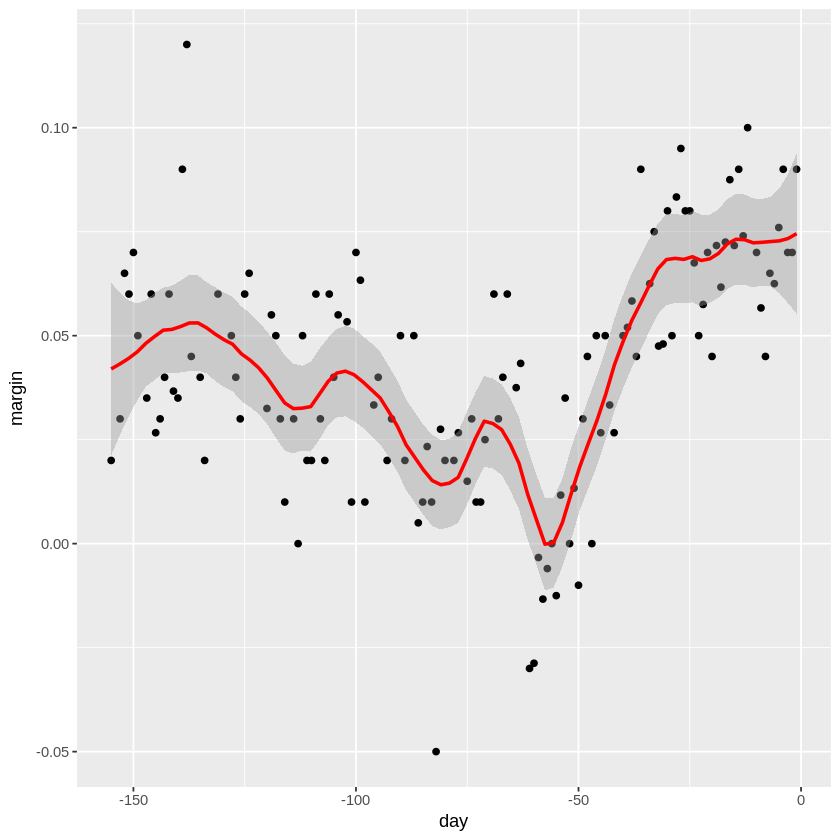

In [14]:
polls_2008 %>% ggplot(aes(day, margin)) +
  geom_point() +
  geom_smooth(color="red", span = 0.15, method = "loess", method.args = list(degree=1))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


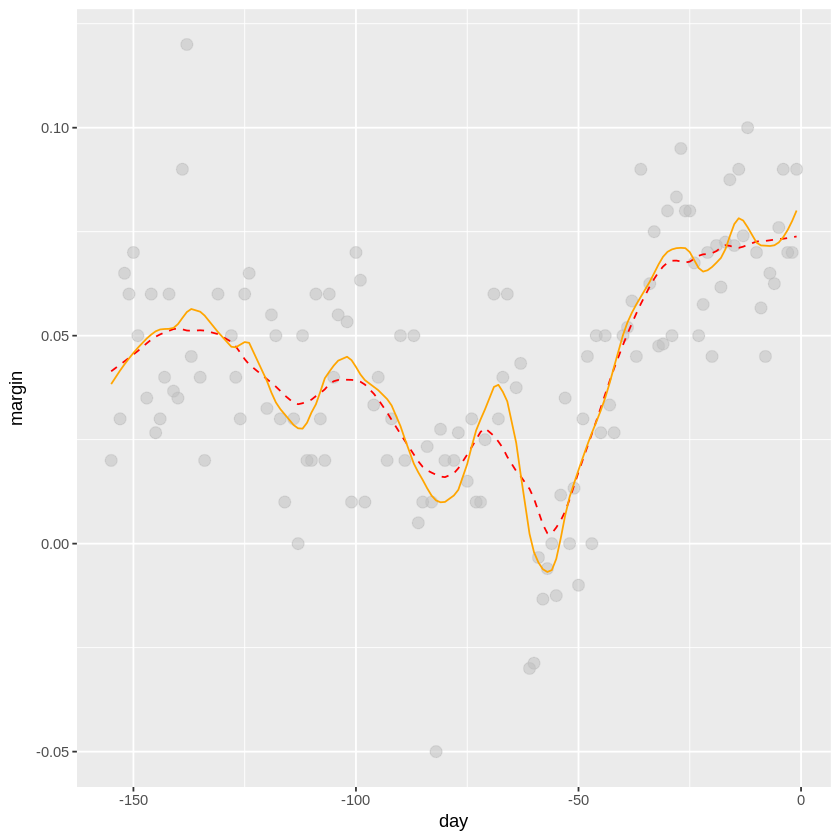

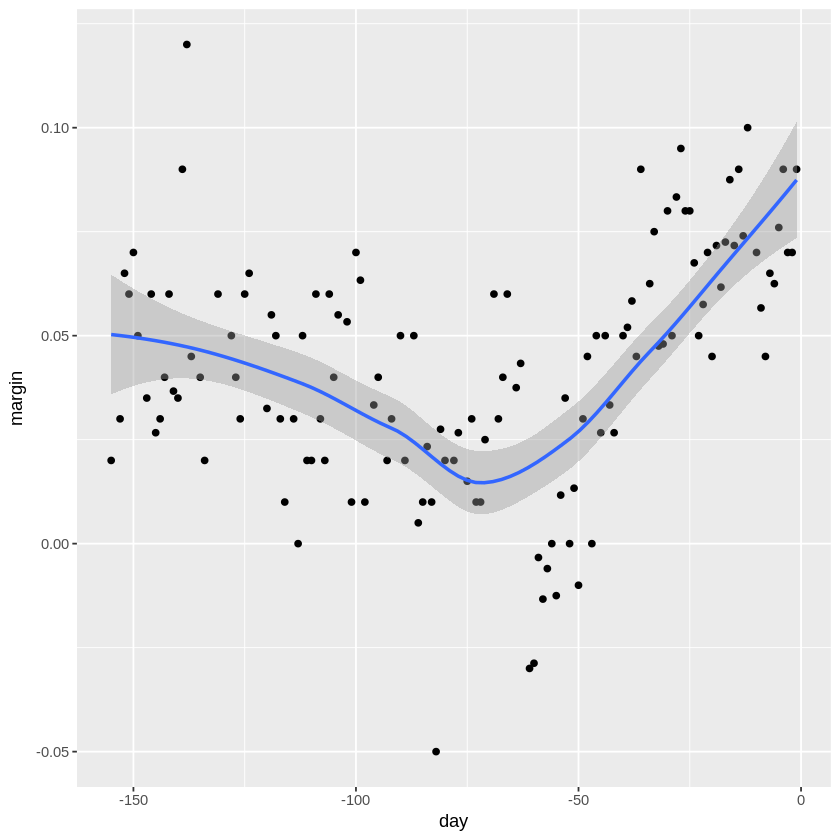

In [15]:
total_days <- diff(range(polls_2008$day))
span <- 28/total_days
fit_1 <- loess(margin ~ day, degree=1, span = span, data=polls_2008)
fit_2 <- loess(margin ~ day, span = span, data=polls_2008)


polls_2008 %>% mutate(smooth_1 = fit_1$fitted, smooth_2 = fit_2$fitted) %>%
     ggplot(aes(day, margin)) +
     geom_point(size = 3, alpha = .5, color = "grey") +
     geom_line(aes(day, smooth_1), color="red", lty = 2) +
     geom_line(aes(day, smooth_2), color="orange", lty = 1)


polls_2008 %>% ggplot(aes(day, margin)) +
     geom_point() +
     geom_smooth()

In [17]:
# Install the pdftools package if it's not already installed
if (!require("pdftools")) {
  install.packages("pdftools")
}

# Load the pdftools library
library(pdftools)

Loading required package: pdftools

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pdftools’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘qpdf’


Warning message in install.packages("pdftools"):
“installation of package ‘pdftools’ had non-zero exit status”


ERROR: Error in library(pdftools): there is no package called ‘pdftools’


In [18]:

library(tidyverse)
library(lubridate)
library(purrr)
library(pdftools)

fn <- system.file("extdata", "RD-Mortality-Report_2015-18-180531.pdf", package="dslabs")
dat <- map_df(str_split(pdf_text(fn), "\n"), function(s){
	s <- str_trim(s)
	header_index <- str_which(s, "2015")[1]
	tmp <- str_split(s[header_index], "\\s+", simplify = TRUE)
	month <- tmp[1]
	header <- tmp[-1]
	tail_index  <- str_which(s, "Total")
	n <- str_count(s, "\\d+")
	out <- c(1:header_index, which(n==1), which(n>=28), tail_index:length(s))
	s[-out] %>%
		str_remove_all("[^\\d\\s]") %>%
		str_trim() %>%
		str_split_fixed("\\s+", n = 6) %>%
		.[,1:5] %>%
		as_tibble() %>%
		setNames(c("day", header)) %>%
		mutate(month = month,
			day = as.numeric(day)) %>%
		gather(year, deaths, -c(day, month)) %>%
		mutate(deaths = as.numeric(deaths))
}) %>%
	mutate(month = recode(month, "JAN" = 1, "FEB" = 2, "MAR" = 3, "APR" = 4, "MAY" = 5, "JUN" = 6,
                          "JUL" = 7, "AGO" = 8, "SEP" = 9, "OCT" = 10, "NOV" = 11, "DEC" = 12)) %>%
	mutate(date = make_date(year, month, day)) %>%
        dplyr::filter(date <= "2018-05-01")

ERROR: Error in library(pdftools): there is no package called ‘pdftools’
